In [21]:
# Dataset source: https://www.openml.org/d/9
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [22]:
autos_df = fetch_openml(name="autos", version=1, as_frame=True)

In [23]:
autos_df.data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [24]:
autos_df.data.isin(['?']).any()

normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

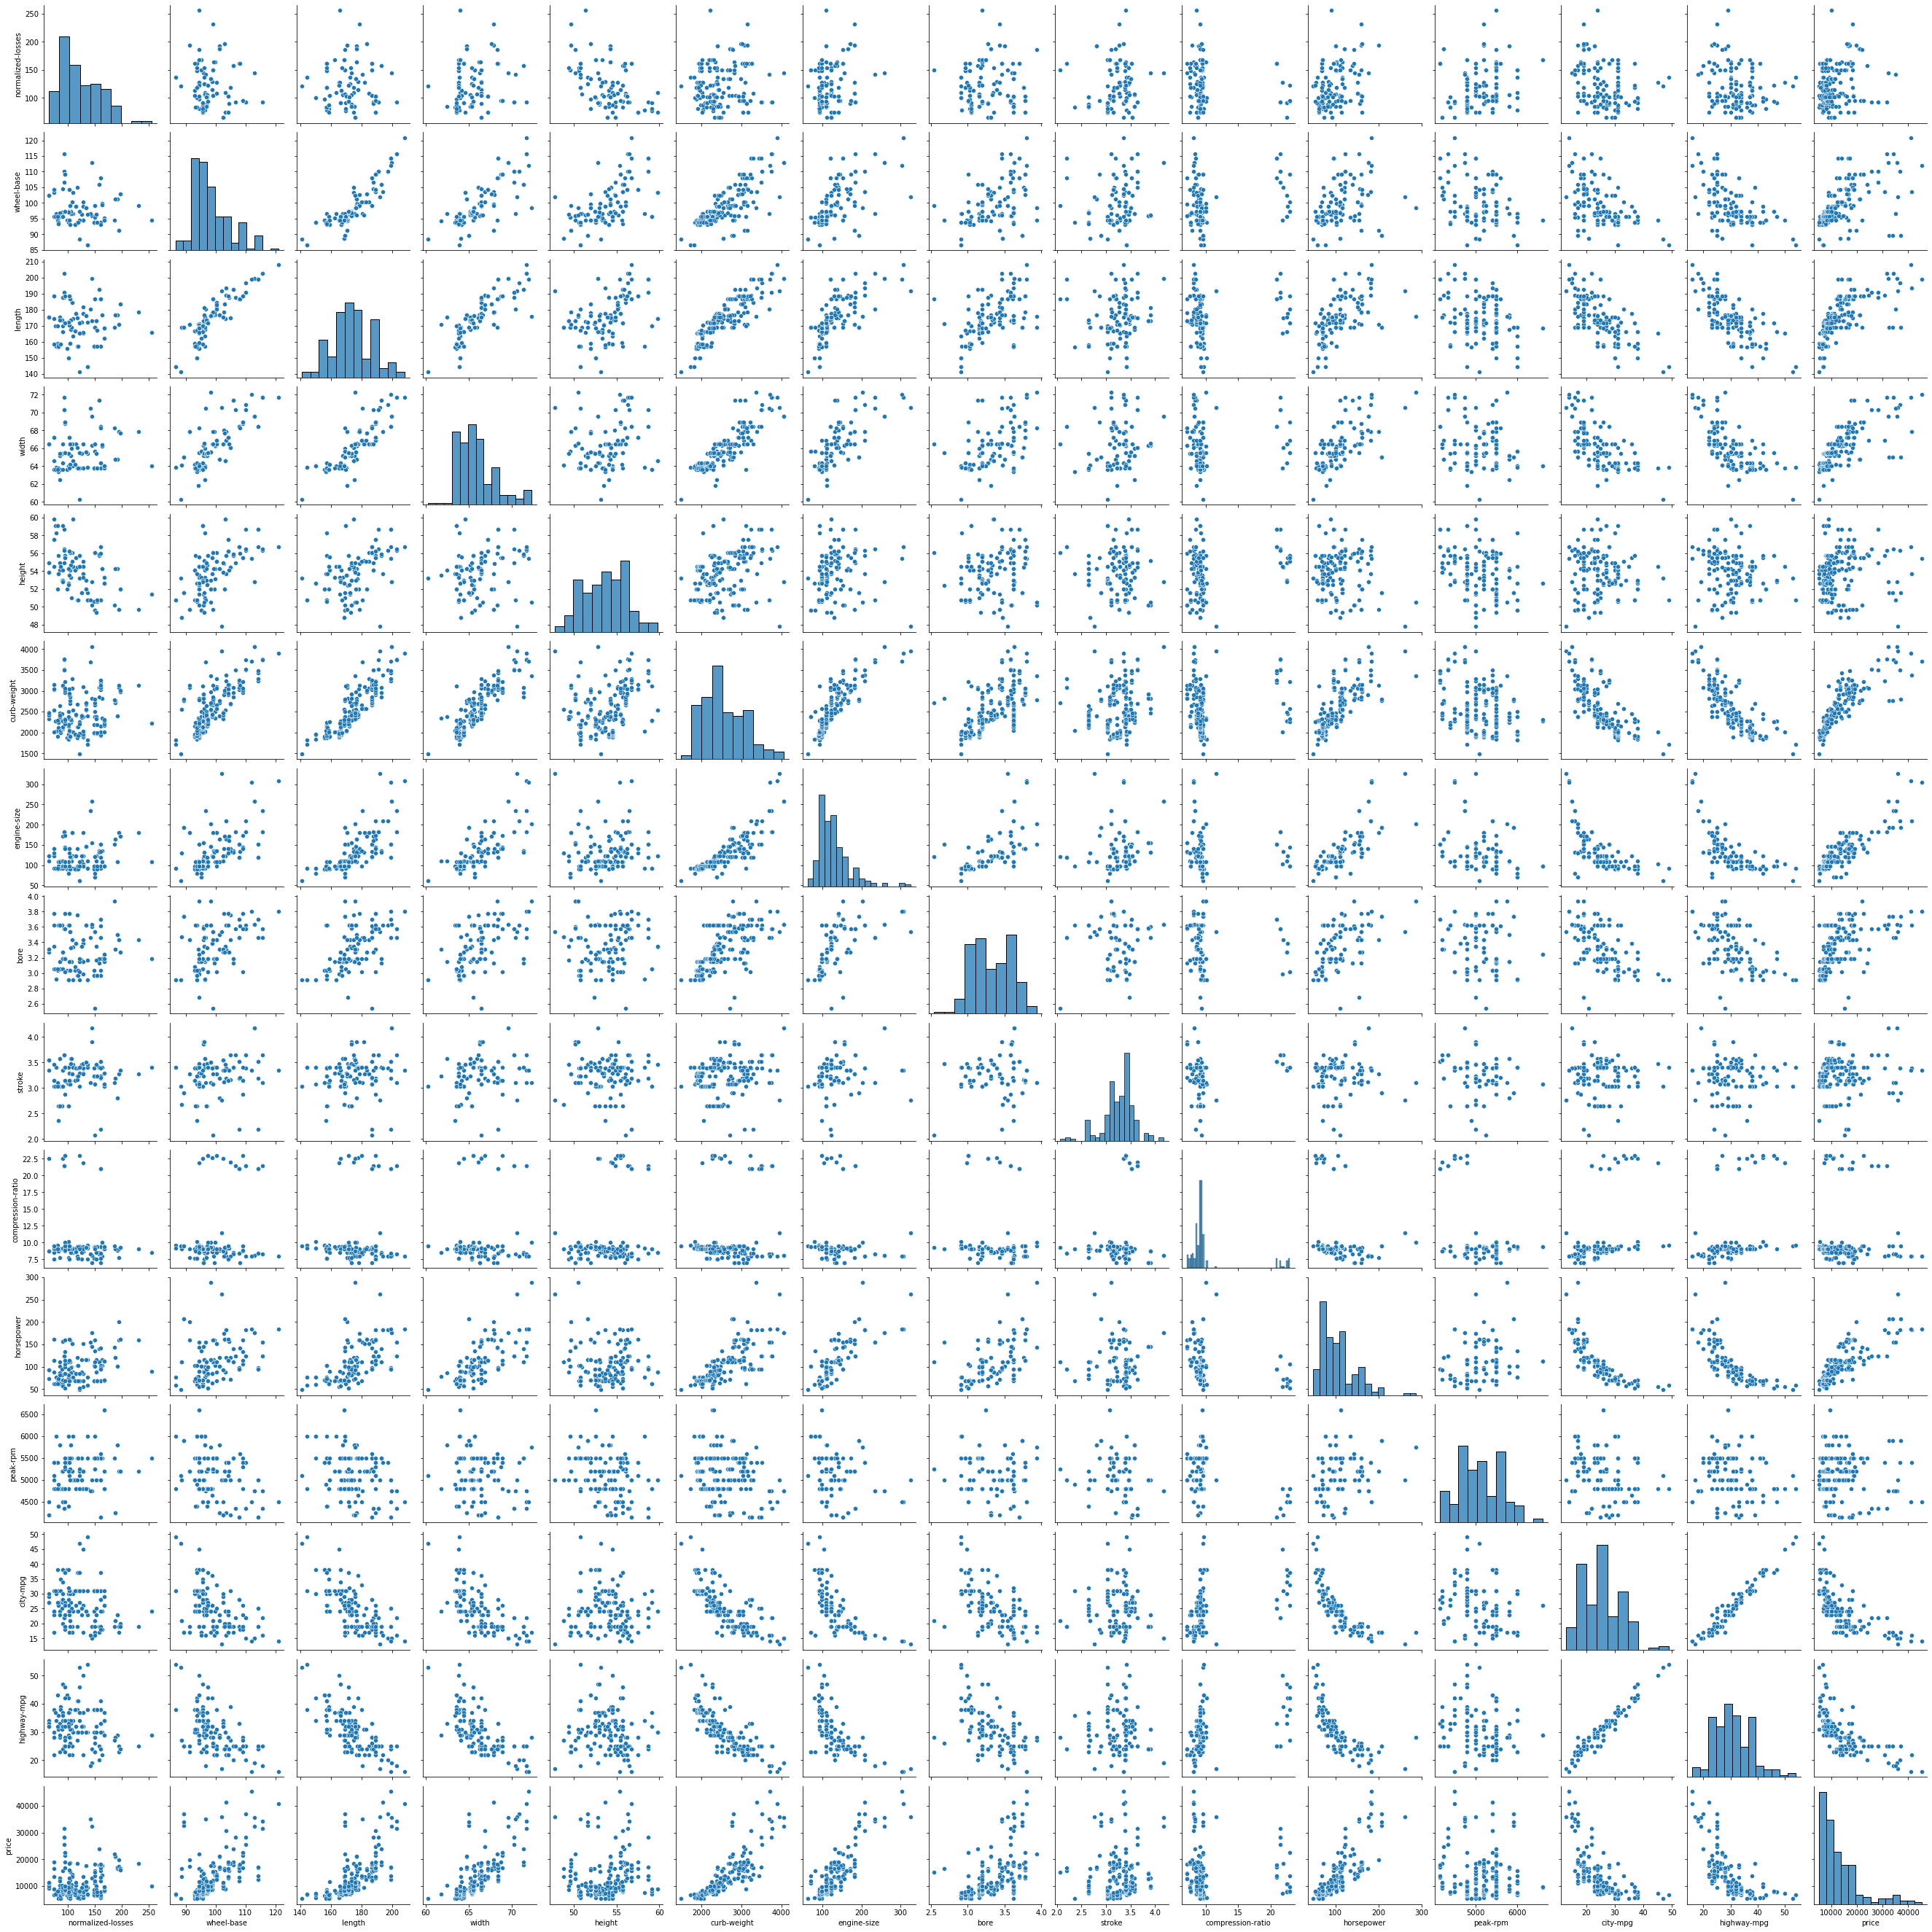

In [25]:
import seaborn as sns
autos_df_plot = autos_df.data.copy()
autos_df_plot['target'] = autos_df.target
sns.pairplot(autos_df_plot)

<AxesSubplot:>

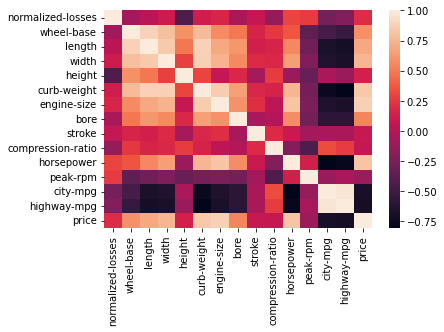

In [26]:
sns.heatmap(autos_df_plot.corr())

In [27]:
autos_df.target.head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: category
Categories (7, object): ['-3', '-2', '-1', '0', '1', '2', '3']

In [28]:
autos_df.data.isna().sum()

normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [29]:
# Replace losses with 0
autos_df.data['normalized-losses'].fillna(0, inplace=True)
autos_df.data['num-of-doors'].fillna(method="backfill", inplace=True)
autos_df.data['bore'].fillna(method='backfill', inplace=True)
autos_df.data['stroke'].fillna(method='backfill', inplace=True)
autos_df.data['horsepower'].fillna(method='backfill',  inplace=True)
autos_df.data['peak-rpm'].fillna(method='backfill', inplace=True)
autos_df.data['price'].fillna(method='backfill', inplace=True)

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
X = autos_df.data
y = autos_df.target

In [31]:
autos_df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   normalized-losses  205 non-null    float64 
 1   make               205 non-null    category
 2   fuel-type          205 non-null    category
 3   aspiration         205 non-null    category
 4   num-of-doors       205 non-null    category
 5   body-style         205 non-null    category
 6   drive-wheels       205 non-null    category
 7   engine-location    205 non-null    category
 8   wheel-base         205 non-null    float64 
 9   length             205 non-null    float64 
 10  width              205 non-null    float64 
 11  height             205 non-null    float64 
 12  curb-weight        205 non-null    float64 
 13  engine-type        205 non-null    category
 14  num-of-cylinders   205 non-null    category
 15  engine-size        205 non-null    float64 
 16  fuel-sys

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

preprocessor = make_column_transformer(
    (OrdinalEncoder(), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='passthrough'
)

In [33]:
X = preprocessor.fit_transform(X, y)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

In [35]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(max_iter=100000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [36]:
from sklearn.metrics import confusion_matrix, f1_score


y_test_pred = logistic_model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[ 4,  1,  0,  0,  0],
       [ 5,  9,  2,  0,  0],
       [ 0,  1, 10,  1,  2],
       [ 0,  2,  2,  6,  2],
       [ 0,  0,  0,  0,  5]])

In [37]:
f1_score(y_test, y_test_pred, average='weighted')

0.6526644861490596

In [38]:
from sklearn.linear_model import LogisticRegressionCV

logistic_model_cv = LogisticRegressionCV(Cs=np.logspace(-10, 10, 21),cv=10, max_iter=100000)
logistic_model_cv.fit(X_train, y_train)
y_test_pred_cv = logistic_model_cv.predict(X_test)

/Users/bachfischer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [39]:
f1_score(y_test, y_test_pred_cv, average='weighted')


0.6184684325400506

<AxesSubplot:>

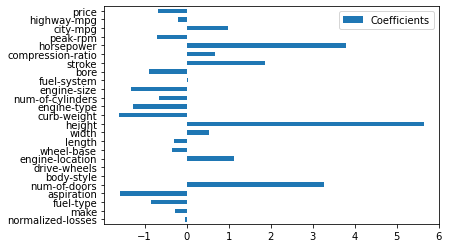

In [40]:
coefficient_names = list(autos_df.data.columns)
coefficients_cv_class_1 = pd.DataFrame(data=logistic_model_cv.coef_[0], index=coefficient_names, columns=["Coefficients"])
coefficients_cv_class_1.plot(kind="barh")

<AxesSubplot:>

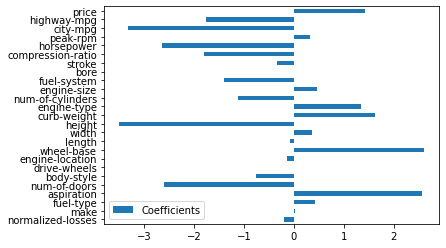

In [41]:
coefficient_names = list(autos_df.data.columns)
coefficients_cv_class_6 = pd.DataFrame(data=logistic_model_cv.coef_[5], index=coefficient_names, columns=["Coefficients"])
coefficients_cv_class_6.plot(kind="barh")

In [42]:
logistic_model_cv.classes_

array(['-1', '-2', '0', '1', '2', '3'], dtype=object)